# COVID-19 자료 시각화 / 선형회귀분석모델을 사용한 분석

대한민국의 코로나-19의 날짜별 확진자 수와 시도별 확진자 수를 분석해보고, 
날짜에 따른 확진자수와 진료횟수와 확진자수의 분석을 선형회귀분석 모델을 이용하여 분석한다.

In [75]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [82]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import csv
import tensorflow.compat.v1 as tf
import os
tf.disable_v2_behavior() 

df=pd.read_csv('TargetData/Time.csv')
dfRegional=pd.read_csv('TargetData/kr_regional_daily.csv')
#dfRegional['date'] = pd.to_datetime(dfRegional['date'], format='%Y%m%d')
dfRegional['date'] = dfRegional['date']-20200000

dfDaily = pd.read_csv('TargetData/kr_daily2.csv')
dfDaily['date'] = pd.to_datetime(dfDaily['date'],format='%Y%m%d')
print(dfDaily)

dfTimeAge = pd.read_csv('TargetData/TimeAgeDaily.csv')
print(dfTimeAge)

dfTimeAge2 = pd.read_csv('TargetData/TimeAge.csv')
print(dfTimeAge2)

print(dfRegional[dfRegional['region']=='대구'])
print(df)

dfKrDaily = pd.read_csv('TargetData/kr_daily.csv')
dfKrDaily['date'] = pd.to_datetime(dfKrDaily['date'],format='%Y%m%d')

writer = pd.ExcelWriter('data/timeData.xlsx', engine='xlsxwriter')
df.to_excel(writer, sheet_name='Sheet1')
writer.close() 

writer = pd.ExcelWriter('data/timeDailyData.xlsx', engine='xlsxwriter')
dfDaily.to_excel(writer, sheet_name='Sheet1')
writer.close()

writer = pd.ExcelWriter('data/DailytimeAgeData.xlsx', engine='xlsxwriter')
dfTimeAge.to_excel(writer, sheet_name='Sheet1')
writer.close()

writer = pd.ExcelWriter('data/timeAgeData.xlsx', engine='xlsxwriter')
dfTimeAge2.to_excel(writer, sheet_name='Sheet1')
writer.close()

writer = pd.ExcelWriter('data/RegionalData.xlsx', engine='xlsxwriter')
dfRegional.to_excel(writer, sheet_name='Sheet1')
writer.close()

          date  confirmed  death  released  tested  negative
0   2020-01-21          1      0         0       1         0
1   2020-01-22          0      0         0       0         0
2   2020-01-23          0      0         0       0         0
3   2020-01-24          1      0         0       1         0
4   2020-01-25          0      0         0       0         0
..         ...        ...    ...       ...     ...       ...
152 2020-06-21         48      0        12    5562      6913
153 2020-06-22         17      0        13    5603      6254
154 2020-06-23         46      1        27   13946     11025
155 2020-06-24         51      0        22   12585     14567
156 2020-06-25         28      1        44   11881     13198

[157 rows x 6 columns]
           date  time  age  confirmed  deceased
0    2020-03-02     0   0s         32         0
1    2020-03-03     0   0s          2         0
2    2020-03-04     0   0s          0         0
3    2020-03-05     0   0s          4         0
4   

In [23]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import csv
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior() 

df=pd.read_csv('TargetData/Time.csv')
dfRegional=pd.read_csv('TargetData/kr_regional_daily.csv')
#dfRegional['date'] = pd.to_datetime(dfRegional['date'], format='%Y%m%d')
dfRegional['date'] = dfRegional['date']-20200000

dfDaily = pd.read_csv('TargetData/kr_daily2.csv')
print(dfDaily)

dfTimeAge = pd.read_csv('TargetData/TimeAge.csv')
print(dfTimeAge)

print(dfRegional[dfRegional['region']=='대구'])
print(df)

         date  confirmed  death  released  tested  negative
0    20200121          1      0         0       1         0
1    20200122          0      0         0       0         0
2    20200123          0      0         0       0         0
3    20200124          1      0         0       1         0
4    20200125          0      0         0       0         0
..        ...        ...    ...       ...     ...       ...
152  20200621         48      0        12    5562      6913
153  20200622         17      0        13    5603      6254
154  20200623         46      1        27   13946     11025
155  20200624         51      0        22   12585     14567
156  20200625         28      1        44   11881     13198

[157 rows x 6 columns]
           date  time  age  confirmed  deceased
0    2020-03-02     0   0s         32         0
1    2020-03-02     0  10s        169         0
2    2020-03-02     0  20s       1235         0
3    2020-03-02     0  30s        506         1
4    2020-03-02 

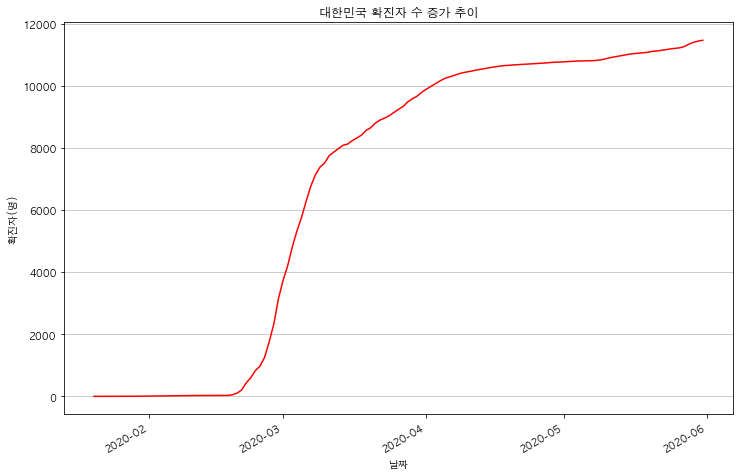

In [63]:
df["date"] = pd.to_datetime(df["date"])
x = df['date']
y = df['confirmed']
plt.rc('font',family="AppleGothic")
plt.figure().add_subplot().set_title('대한민국 확진자 수 증가 추이')
plt.plot(x,y,color="red")
plt.xlabel('날짜')
plt.ylabel('확진자(명)')
plt.gca().xaxis.set_major_locator(matplotlib.dates.MonthLocator()) 
plt.gca().xaxis.set_major_formatter(matplotlib.dates.DateFormatter("%Y-%m"))
plt.gcf().autofmt_xdate()
plt.grid(True, axis='y', color='gray', alpha=0.5, linestyle='-')
plt.rcParams["figure.figsize"] = (8,8)
fig = plt.gcf()
fig.savefig('data/Korea_date_confirmed.png', dpi=300)
plt.show()
plt.close()

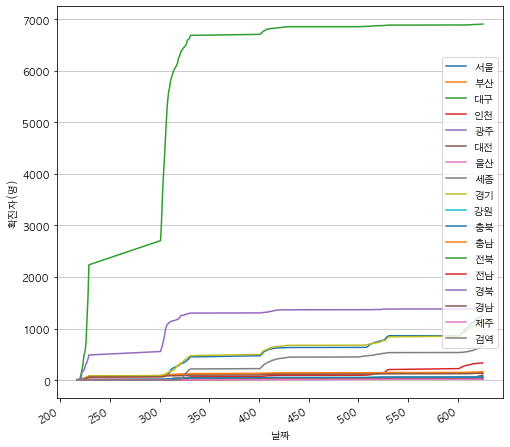

In [64]:
for state in dfRegional['region'].drop_duplicates():
    plt.plot(dfRegional[dfRegional['region'] == state]['date'],dfRegional[dfRegional['region'] == state]['confirmed'],label=state)
plt.legend(loc='right')
plt.xlabel('날짜')
plt.ylabel('확진자(명)')
plt.grid(True, axis='y', color='gray', alpha=0.5, linestyle='-')
plt.gcf().autofmt_xdate()
plt.rcParams["figure.figsize"] = (12,8)
fig = plt.gcf()
fig.savefig('data/state_date_confirmed.png', dpi=300)
plt.show()
plt.close()

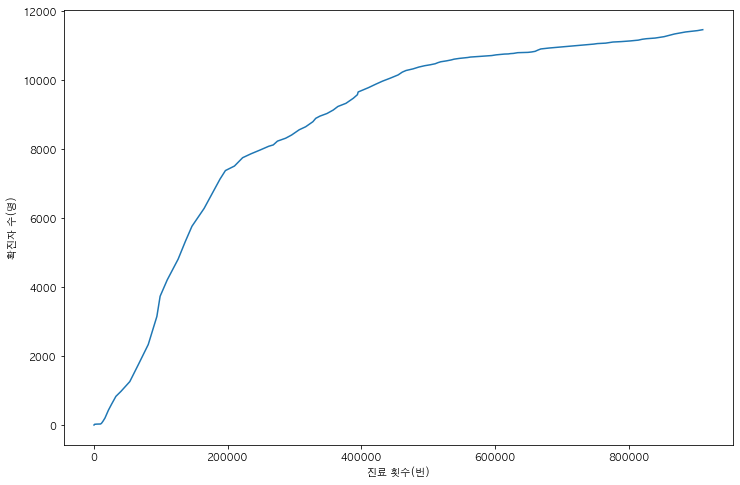

In [65]:
x = df['test']
y = df['confirmed']
plt.plot(x,y)
plt.xlabel('진료 횟수(번)')
plt.ylabel('확진자 수(명)')
plt.rcParams["figure.figsize"] = (12,8)
fig = plt.gcf()
fig.savefig('data/test_confirmed.png', dpi=300)
plt.show()

In [26]:
xData = df['test'].tolist()
yData = df['confirmed'].tolist()

W = tf.Variable(tf.random_uniform([1],0.01,0.001))
b = tf.Variable(tf.random_uniform([1],0,0))
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)
H = W*X+b
cost = tf.reduce_mean(tf.square(H-Y))
a=tf.Variable(0.00000000000001)
optimizer=tf.train.GradientDescentOptimizer(a)
train = optimizer.minimize(cost)
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)
for i in range(15001):
    sess.run(train, feed_dict={X:xData, Y:yData})
    if i % 500 ==0:
        print(i, sess.run(cost,feed_dict={X:xData,Y:yData}),sess.run(W),sess.run(b))
w = sess.run(W)
b = sess.run(b)

0 24212854.0 [0.00765257] [8.251856e-11]
500 4440199.5 [0.01619944] [2.0753433e-08]
1000 4168127.5 [0.01720201] [2.8742354e-08]
1500 4164384.2 [0.01731962] [3.5243556e-08]
2000 4164332.8 [0.0173334] [4.1570306e-08]
2500 4164332.2 [0.01733503] [4.7876597e-08]
3000 4164332.2 [0.01733503] [5.4180887e-08]
3500 4164332.2 [0.01733503] [6.0485426e-08]
4000 4164332.2 [0.01733503] [6.679149e-08]
4500 4164332.2 [0.01733503] [7.309756e-08]
5000 4164332.2 [0.01733503] [7.940363e-08]
5500 4164332.2 [0.01733503] [8.5709694e-08]
6000 4164332.2 [0.01733503] [9.201576e-08]
6500 4164332.2 [0.01733503] [9.832183e-08]
7000 4164332.2 [0.01733503] [1.04627894e-07]
7500 4164332.2 [0.01733503] [1.1093396e-07]
8000 4164332.2 [0.01733503] [1.1724003e-07]
8500 4164332.2 [0.01733503] [1.2354366e-07]
9000 4164332.2 [0.01733503] [1.2984617e-07]
9500 4164332.2 [0.01733503] [1.3614869e-07]
10000 4164332.2 [0.01733503] [1.424512e-07]
10500 4164332.2 [0.01733503] [1.4875371e-07]
11000 4164332.2 [0.01733503] [1.5505623e

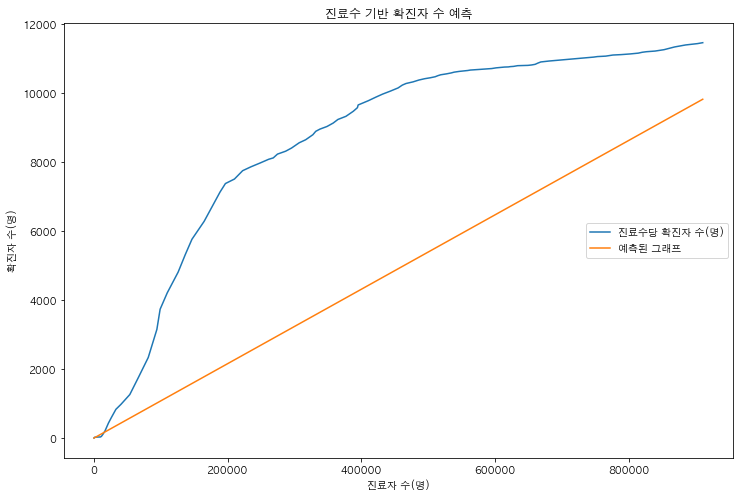

In [66]:
x = df['test']
y = df['confirmed']
y2 = w*x+b
plt.plot(x,y, label='진료수당 확진자 수(명)')
plt.plot(x,y2, label='예측된 그래프')
plt.legend(loc="center right")
plt.xlabel('진료자 수(명)')
plt.ylabel('확진자 수(명)')
plt.title('진료수 기반 확진자 수 예측')
plt.rcParams["figure.figsize"] = (12,8)
fig = plt.gcf()
fig.savefig('data/test_confirmed_predicted.png', dpi=300)
plt.show()

In [29]:
xData = dfRegional[dfRegional['region']=='대구']['date'].tolist()
yData = dfRegional[dfRegional['region']=='대구']['confirmed'].tolist()

W = tf.Variable(tf.random_uniform([1],10,15))
b = tf.Variable(tf.random_uniform([1],0,0.1))
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)
H = W*X+b
cost = tf.reduce_mean(tf.square(H-Y))
a=tf.Variable(0.0000000001)
optimizer=tf.train.GradientDescentOptimizer(a)
train = optimizer.minimize(cost)
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)
for i in range(10001):
    sess.run(train, feed_dict={X:xData, Y:yData})
    if i % 500 ==0:
        print(i, sess.run(cost,feed_dict={X:xData,Y:yData}),sess.run(W),sess.run(b))
w2 = sess.run(W)
b2 = sess.run(b)

0 2053120.1 [13.675195] [0.09086696]
500 2052760.8 [13.670903] [0.09086696]
1000 2052409.0 [13.666612] [0.09086696]
1500 2052101.4 [13.662784] [0.09086696]
2000 2051800.9 [13.658969] [0.09086696]
2500 2051506.6 [13.655154] [0.09086696]
3000 2051217.9 [13.65134] [0.09086696]
3500 2050935.1 [13.647525] [0.09086696]
4000 2050658.6 [13.64371] [0.09086696]
4500 2050416.8 [13.640305] [0.09086964]
5000 2050184.0 [13.636967] [0.09087336]
5500 2049956.0 [13.633629] [0.09087709]
6000 2049732.8 [13.630291] [0.09088081]
6500 2049513.8 [13.626953] [0.09088454]
7000 2049299.5 [13.623615] [0.09088826]
7500 2049089.8 [13.620277] [0.09089199]
8000 2048909.8 [13.617354] [0.09089571]
8500 2048736.9 [13.614493] [0.09089944]
9000 2048567.6 [13.611632] [0.09090316]
9500 2048401.4 [13.608771] [0.09090689]
10000 2048238.8 [13.60591] [0.09091061]


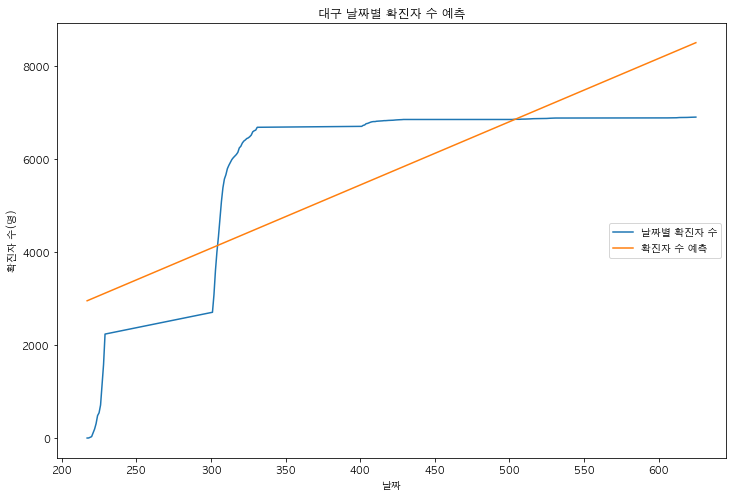

In [67]:
x = dfRegional[dfRegional['region']=='대구']['date']
y = dfRegional[dfRegional['region']=='대구']['confirmed']
y2 = w2*x+b2
plt.plot(x,y,label="날짜별 확진자 수")
plt.plot(x,y2, label='확진자 수 예측')
plt.legend(loc='center right')
plt.ylabel('확진자 수(명)')
plt.xlabel('날짜')
plt.title('대구 날짜별 확진자 수 예측')
plt.rcParams["figure.figsize"] = (12,8)
fig = plt.gcf()
fig.savefig('data/Daegu_date_confirmed.png', dpi=300)
plt.show()

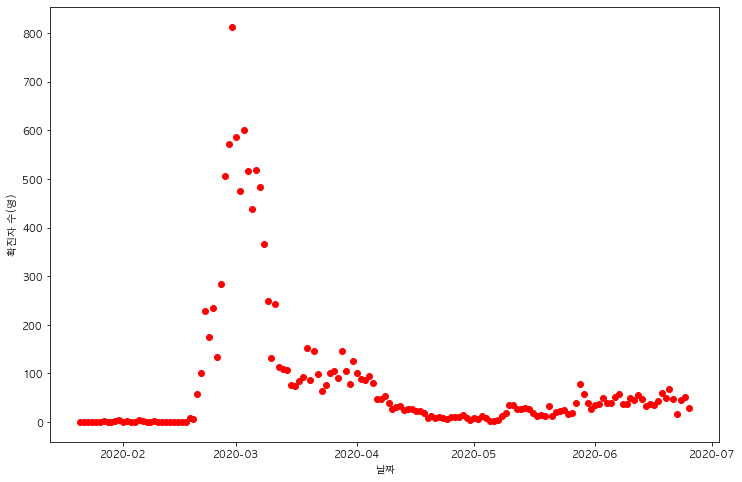

In [68]:
x = dfDaily['date']
y = dfDaily['confirmed']
plt.xlabel('날짜')
plt.ylabel('확진자 수(명)')
plt.plot(x, y,'ro')
fig = plt.gcf()
fig.savefig('data/Daily_date_confirmed.png', dpi=300)
plt.show()

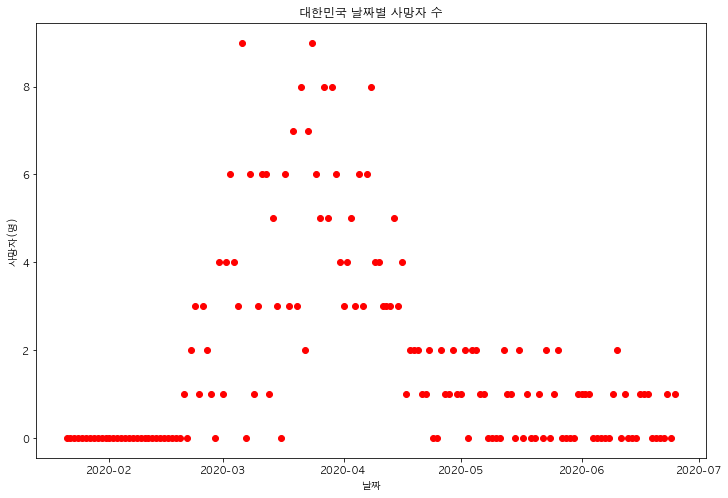

In [69]:
x = dfDaily['date']
y = dfDaily['death']
plt.xlabel('날짜')
plt.ylabel('사망자(명)')
plt.title('대한민국 날짜별 사망자 수')
plt.plot(x, y,'ro')
fig = plt.gcf()
fig.savefig('data/Daily_date_deceased.png', dpi=300)
plt.show()

0 40817228.0 [0.6867998] [0.03465386]
500 16701.074 [0.01002368] [0.03459505]
1000 16700.434 [0.00993899] [0.03459505]
1500 16700.434 [0.00993899] [0.03459505]
2000 16700.434 [0.00993899] [0.03459505]
2500 16700.434 [0.00993899] [0.03459505]
3000 16700.434 [0.00993899] [0.03459505]
3500 16700.434 [0.00993899] [0.03459505]
4000 16700.434 [0.00993899] [0.03459505]
4500 16700.434 [0.00993899] [0.03459505]
5000 16700.434 [0.00993899] [0.03459505]
5500 16700.434 [0.00993899] [0.03459505]
6000 16700.434 [0.00993899] [0.03459505]
6500 16700.434 [0.00993899] [0.03459505]
7000 16700.434 [0.00993899] [0.03459505]
7500 16700.434 [0.00993899] [0.03459505]
8000 16700.434 [0.00993899] [0.03459505]
8500 16700.434 [0.00993899] [0.03459505]
9000 16700.434 [0.00993899] [0.03459505]
9500 16700.434 [0.00993899] [0.03459505]
10000 16700.434 [0.00993899] [0.03459505]


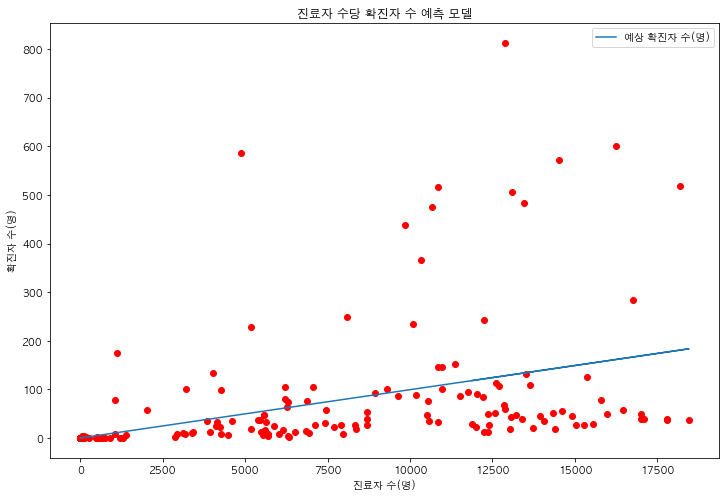

In [70]:
xData = dfDaily['tested'].tolist()
yData = dfDaily['confirmed'].tolist()

W = tf.Variable(tf.random_uniform([1],0,10))
b = tf.Variable(tf.random_uniform([1],0,0.1))
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)
H = W*X+b
cost = tf.reduce_mean(tf.square(H-Y))
a=tf.Variable(0.0000000001)
optimizer=tf.train.GradientDescentOptimizer(a)
train = optimizer.minimize(cost)
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)
for i in range(10001):
    sess.run(train, feed_dict={X:xData, Y:yData})
    if i % 500 ==0:
        print(i, sess.run(cost,feed_dict={X:xData,Y:yData}),sess.run(W),sess.run(b))
w = sess.run(W)
b = sess.run(b)

x = dfDaily['tested']
y = dfDaily['confirmed']
plt.xlabel('진료자 수(명)')
plt.ylabel('확진자 수(명)')
plt.title('진료자 수당 확진자 수 예측 모델')
y2 = w*x+b
plt.plot(x,y,'ro')
plt.plot(x,y2, label="예상 확진자 수(명)")
plt.legend(loc='upper right')
plt.rcParams["figure.figsize"] = (12,8)
fig = plt.gcf()
fig.savefig('data/Daily_tested_confirmed.png', dpi=300)
plt.show()

0 4927164400.0 [8.385993] [0.0938505]
500 3162275.2 [0.9511596] [0.09322029]
1000 3162198.2 [0.95023054] [0.09323891]
1500 3162198.2 [0.95023054] [0.09325754]
2000 3162198.5 [0.9502305] [0.09327617]
2500 3162198.5 [0.9502305] [0.09329479]
3000 3162198.5 [0.9502305] [0.09331342]
3500 3162198.5 [0.9502305] [0.09333204]
4000 3162198.5 [0.9502305] [0.09335067]
4500 3162198.5 [0.9502305] [0.0933693]
5000 3162198.5 [0.9502305] [0.09338792]
5500 3162198.5 [0.9502305] [0.09340655]
6000 3162198.5 [0.9502305] [0.09342518]
6500 3162198.5 [0.9502305] [0.0934438]
7000 3162198.5 [0.9502305] [0.09346243]
7500 3162198.5 [0.9502305] [0.09348106]
8000 3162198.5 [0.9502305] [0.09349968]
8500 3162198.0 [0.9502305] [0.09351831]
9000 3162198.0 [0.9502305] [0.09353694]
9500 3162198.0 [0.9502305] [0.09355556]
10000 3162198.0 [0.9502305] [0.09357419]
[0.9502305]


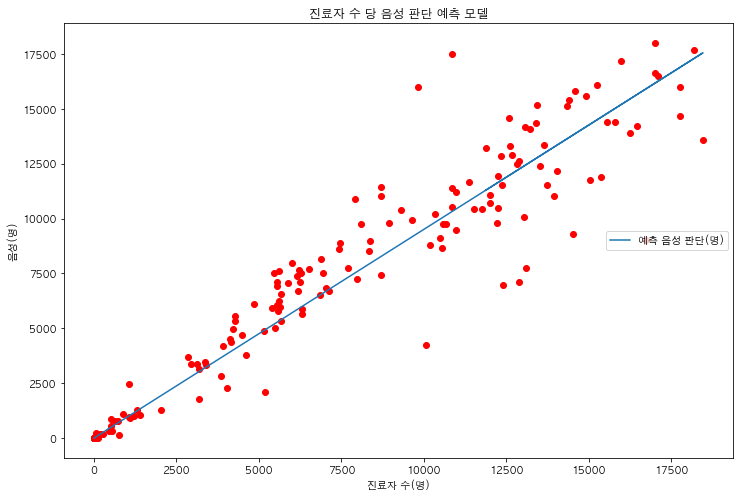

In [71]:
xData = dfDaily['tested'].tolist()
yData = dfDaily['negative'].tolist()

W = tf.Variable(tf.random_uniform([1],0,10))
b = tf.Variable(tf.random_uniform([1],0,0.1))
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)
H = W*X+b
cost = tf.reduce_mean(tf.square(H-Y))
a=tf.Variable(0.0000000001)
optimizer=tf.train.GradientDescentOptimizer(a)
train = optimizer.minimize(cost)
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)
for i in range(10001):
    sess.run(train, feed_dict={X:xData, Y:yData})
    if i % 500 ==0:
        print(i, sess.run(cost,feed_dict={X:xData,Y:yData}),sess.run(W),sess.run(b))
w = sess.run(W)
print(w)
b = sess.run(b)

x = dfDaily['tested']
y = dfDaily['negative']
plt.plot(x, y,'ro')
y2 = w*x+b
plt.title('진료자 수 당 음성 판단 예측 모델')
plt.plot(x,y2, label="예측 음성 판단(명)")
plt.legend(loc='center right')
plt.xlabel('진료자 수(명)')
plt.ylabel('음성(명)')
plt.rcParams["figure.figsize"] = (12,8)
fig = plt.gcf()
fig.savefig('data/Daily_tested_negative.png', dpi=300)
plt.show()

0 129475.44 [7.561759] [0.36944148]
500 0.75345546 [0.00628347] [0.2345271]
1000 0.7529691 [0.00631098] [0.2329682]
1500 0.7524849 [0.00633845] [0.23141208]
2000 0.75200456 [0.0063658] [0.22986236]
2500 0.75152624 [0.00639309] [0.22831641]
3000 0.75105035 [0.0064203] [0.22677414]
3500 0.7505785 [0.00644741] [0.22523831]
4000 0.7501083 [0.00647448] [0.22370507]
4500 0.749641 [0.00650143] [0.2221777]
5000 0.7491768 [0.00652831] [0.22065446]
5500 0.74871504 [0.00655514] [0.21913454]
6000 0.74825656 [0.00658185] [0.21762122]
6500 0.7478003 [0.00660852] [0.21611033]
7000 0.7473466 [0.00663507] [0.21460532]
7500 0.7468961 [0.00666157] [0.21310423]
8000 0.7464474 [0.006688] [0.21160667]
8500 0.7460021 [0.00671432] [0.21011533]
9000 0.7455588 [0.00674061] [0.20862621]
9500 0.74511904 [0.00676677] [0.20714355]
10000 0.7446811 [0.00679289] [0.20566405]
<class 'pandas.core.series.Series'>


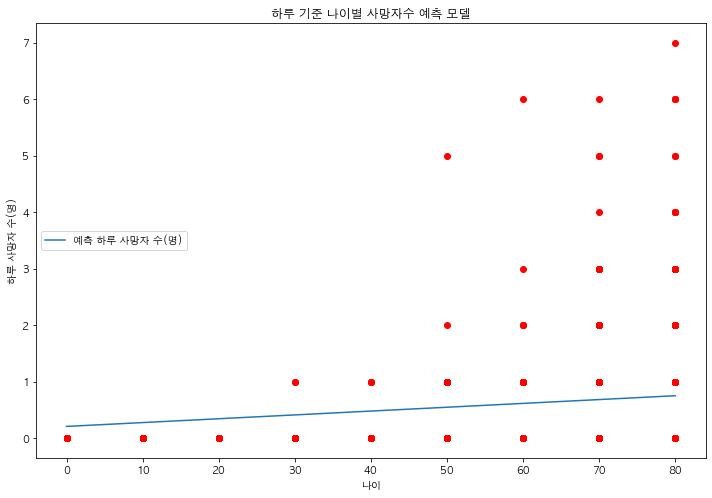

In [73]:
xData = dfTimeAge['age'].tolist()
# for data in xData:
#     temp = data.replace('s','')
#     print(temp)
    
for i in range(0,len(xData),1):
    xData[i] = int(xData[i].replace('s',''))
yData = dfTimeAge['deceased'].tolist()

W = tf.Variable(tf.random_uniform([1],0,10))
b = tf.Variable(tf.random_uniform([1],0,1))
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)
H = W*X+b
cost = tf.reduce_mean(tf.square(H-Y))
a=tf.Variable(0.00001)
optimizer=tf.train.GradientDescentOptimizer(a)
train = optimizer.minimize(cost)
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)
for i in range(10001):
    sess.run(train, feed_dict={X:xData, Y:yData})
    if i % 500 ==0:
        print(i, sess.run(cost,feed_dict={X:xData,Y:yData}),sess.run(W),sess.run(b))
w = sess.run(W)
b = sess.run(b)

x = pd.Series(xData)
y = dfTimeAge['deceased']
plt.plot(x, y,'ro',ms=6)
print(type(x))
y = w*x+b
plt.plot(x,y, label='예측 하루 사망자 수(명)')
plt.xlabel('나이')
plt.legend(loc="center left")
plt.ylabel('하루 사망자 수(명)')
plt.title('하루 기준 나이별 사망자수 예측 모델')
plt.rcParams["figure.figsize"] = (12,8)
fig = plt.gcf()
fig.savefig('data/Daily_age_deceased_predicted.png', dpi=300)
plt.show()

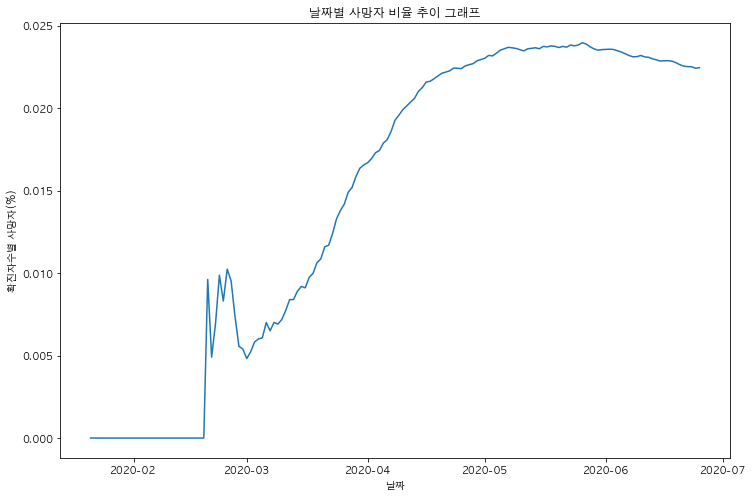

In [74]:
x=dfKrDaily['date']
y=dfKrDaily['death']/dfKrDaily['confirmed']
plt.plot(x,y)
plt.xlabel('날짜')
plt.ylabel('확진자수별 사망자(%)')
plt.title('날짜별 사망자 비율 추이 그래프')
fig = plt.gcf()
fig.savefig('data/Daily_date_perConfirmed.png', dpi=300)
plt.show()